In [1]:
from dreye.hardware import dummy_system
from dreye.hardware import dummy_spectrometer
from dreye.core.spectrum_utils import create_gaussian_spectrum
import numpy as np
import matplotlib.pyplot as plt
import warnings

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


Text(0, 0.5, 'irradiance')

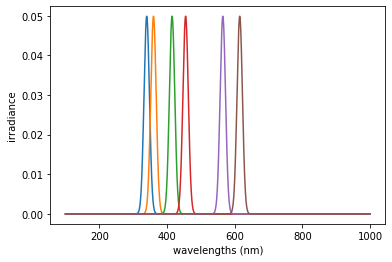

In [2]:
wls = np.arange(100, 1000, 0.1)
dummy_leds = create_gaussian_spectrum(
    wls, 
    [340, 360, 415, 455, 565, 615], 
    std=8, 
    units='spectralirradiance'
)
plt.plot(dummy_leds.domain, dummy_leds.magnitude)
plt.xlabel('wavelengths (nm)')
plt.ylabel('irradiance')

In [3]:
leds = ['duv', 'uv', 'violet', 'rblue', 'lime', 'orange']
channels = ['Dev2/ao1', 'Dev3/ao1', 
            'Dev3/ao0', 'Dev1/ao1', 
            'Dev2/ao0', 'Dev1/ao0']
zeros = [4.4] * 5 + [0.]
maxs = [0.] * 5 + [5.]

In [4]:
outputs = []
for led, ch, z, m in zip(leds, channels, zeros, maxs):
    outputs.append(
        dummy_system.DummyOutput(
            ch, led, 
            zero_boundary=z, 
            max_boundary=m, 
            units='V'
        )
    )

In [5]:
system = dummy_system.DummySystem(outputs)

In [6]:
system

DummySystem contains:
DummyOutput(object=Dev2/ao1, name=duv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao1, name=uv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao0, name=violet, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao1, name=rblue, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev2/ao0, name=lime, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao0, name=orange, max=5.0 volt, zero=0.0 volt)

In [7]:
spec = dummy_spectrometer.Spectrometer(
    wls, 
    dummy_leds, 
    system,
    noise_scale=2, 
)

In [8]:
from dreye.hardware.measurement_runner import MeasurementRunner

In [9]:
runner = MeasurementRunner(
    system, 
    spec, 
    wls=None, # np.arange(200, 800, 1), 
    smoothing_window=1, 
    n_steps=10, 
    n_avg=1, 
    remove_zero=False, 
)

In [10]:
runner.run(verbose=2)


---------------------STARTING MEASUREMENTS-----------------------

-----------------------------------------------------------------
Starting measurement for duv.
sending 10 values
step 0: 4.4 volt == 0.0 photons/second
step 1: 3.9111111111111114 volt == 18137271.6338027 photons/second
step 2: 3.4222222222222225 volt == 35996124.64799682 photons/second
step 3: 2.9333333333333336 volt == 54033336.58037255 photons/second
step 4: 2.4444444444444446 volt == 72580870.41834618 photons/second
step 5: 1.9555555555555557 volt == 90015215.50018662 photons/second
step 6: 1.4666666666666668 volt == 107244627.24804418 photons/second
step 7: 0.9777777777777779 volt == 124776133.75018434 photons/second
step 8: 0.48888888888888893 volt == 143124473.9760534 photons/second
step 9: 0.0 volt == 161353284.36382627 photons/second
Finished measurement for "duv".
-----------------------------------------------------------------


/Users/matthias.christenson/Documents/dreye/dreye/hardware/base_spectrometer.py:171: RuntimeWarning: divide by zero encountered in double_scalars
  factor = self.ideal_mid_point / maxi
/Users/matthias.christenson/Documents/dreye/dreye/core/signal.py:456: RuntimeWarning: chosen domain interval must be rounded down for filtering
  RuntimeWarning



Finished conversion of measurement for "duv".

-----------------------------------------------------------------
Starting measurement for uv.
sending 10 values
step 0: 4.4 volt == 0.0 photons/second
step 1: 3.9111111111111114 volt == 18119511.831485476 photons/second
step 2: 3.4222222222222225 volt == 36234205.720421076 photons/second
step 3: 2.9333333333333336 volt == 54224255.767839365 photons/second
step 4: 2.4444444444444446 volt == 72231785.19841231 photons/second
step 5: 1.9555555555555557 volt == 90279500.13003829 photons/second
step 6: 1.4666666666666668 volt == 108037334.06088135 photons/second
step 7: 0.9777777777777779 volt == 126161053.40413871 photons/second
step 8: 0.48888888888888893 volt == 144621147.53065106 photons/second
step 9: 0.0 volt == 163029231.64190698 photons/second
Finished measurement for "uv".
-----------------------------------------------------------------

Finished conversion of measurement for "uv".

---------------------------------------------------

In [11]:
system.spms.units

/Users/matthias.christenson/Documents/dreye/dreye/utilities/common.py:35: RuntimeWarning: divide by zero encountered in log10
  return -np.floor(np.log10(np.abs(x))) + digits - 1


<Unit('microE_Q')>

Text(0, 0.5, 'photon flux')

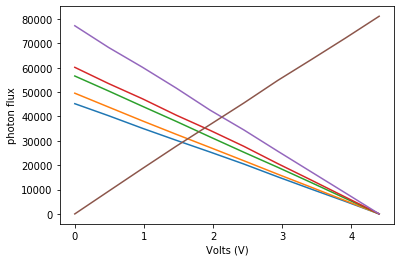

In [12]:
plt.plot(
    system.spms.domain, system.spms
)
plt.xlabel('Volts (V)')
plt.ylabel('photon flux')

In [14]:
system.spms.map(np.array([30000]*6))

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/Documents/dreye/dreye/utilities/common.py:35: RuntimeWarning: divide by zero encountered in log10
  return -np.floor(np.log10(np.abs(x))) + digits - 1
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/Documents/dreye/dreye/utilities/common.py:35: RuntimeWarning: divide by zero encountered in log10
  return -np.floor(np.log10(np.abs(x))) + digits - 1
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warning

array([[1.48763124, 1.70734017, 2.07906699, 2.27516102, 2.69459339,
        1.58867947]]) <Unit('volt')>

In [ ]:
plt.plot(
    system.spms.normalized_spectrum.wavelengths, 
    system.spms.normalized_spectrum)
plt.xlabel('wavelengths')
plt.ylabel('normalized flux intensity')

In [27]:
runner.save('measurement_test.json')

In [51]:
from dreye.io import read_json

In [47]:
system_loaded = read_json('measurement_test.json')

In [48]:
print(system_loaded)

DummySystem contains:
DummyOutput(object=Dev2/ao1, name=duv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao1, name=uv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao0, name=violet, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao1, name=rblue, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev2/ao0, name=lime, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao0, name=orange, max=5.0 volt, zero=0.0 volt)


Text(0, 0.5, 'photon flux')

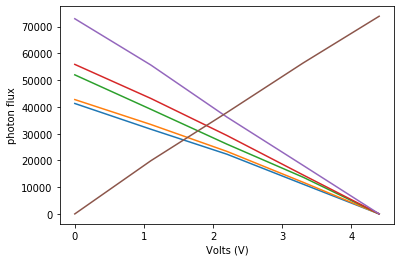

In [50]:
plt.plot(
    system_loaded.spms.domain, system_loaded.spms
)
plt.xlabel('Volts (V)')
plt.ylabel('photon flux')

Text(0, 0.5, 'normalized flux intensity')

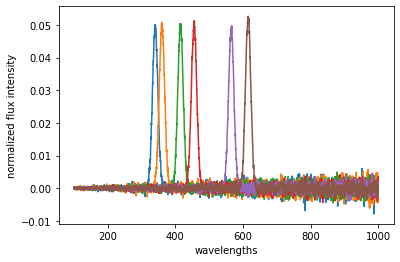

In [49]:
plt.plot(
    system_loaded.spms.normalized_spectrum.wavelengths, 
    system_loaded.spms.normalized_spectrum)
plt.xlabel('wavelengths')
plt.ylabel('normalized flux intensity')